## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

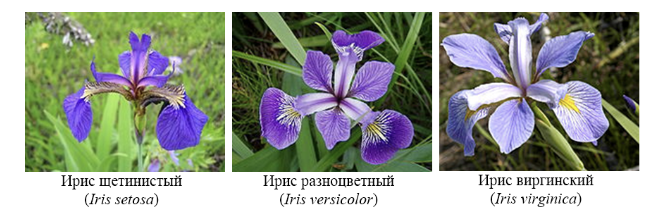

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

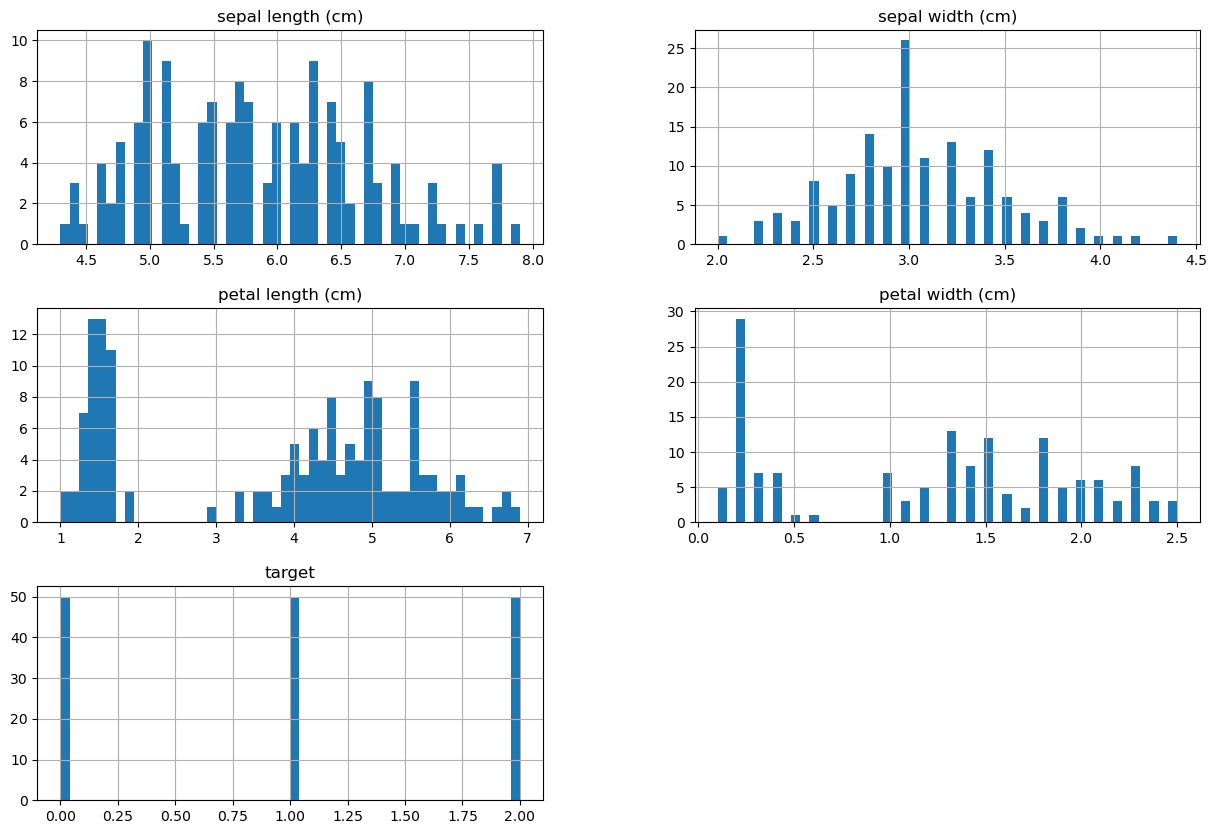

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);
plt.show()

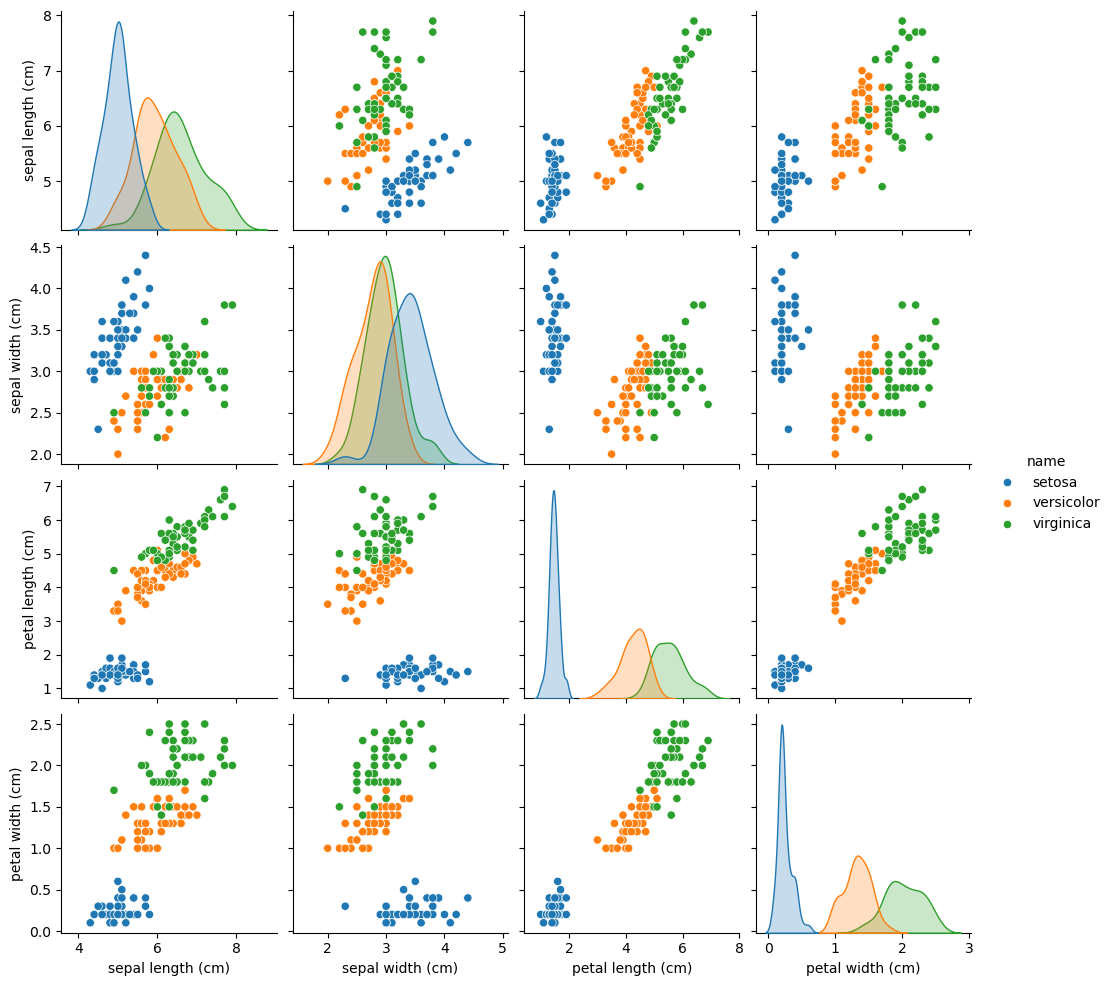

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')
plt.show()

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


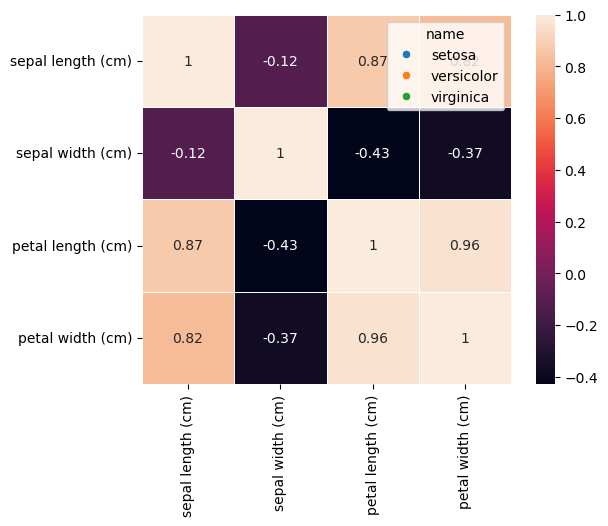

In [20]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)
plt.show()

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
species_cols = pd.get_dummies(df["Species"], dtype=int)

In [23]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [24]:
X = pd.concat([df[feature_names], species_cols], axis = 1)
X.shape

(150, 7)

In [25]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,1,2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [26]:
X = df.drop('Species', axis=1) 
y = df['Species']

# Модели

In [27]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 6.19 ms


KNeighborsClassifier()

In [32]:
# making prediction
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [33]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

In [34]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.96
test accuracy:  0.98


In [35]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.98

In [36]:
knn_f1 = f1_score(y_test, y_test_predict, average='weighted')
knn_f1

0.98

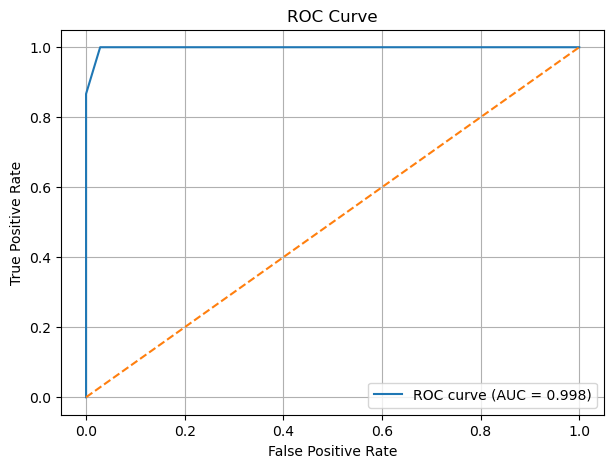

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Классификатор дерева решений

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

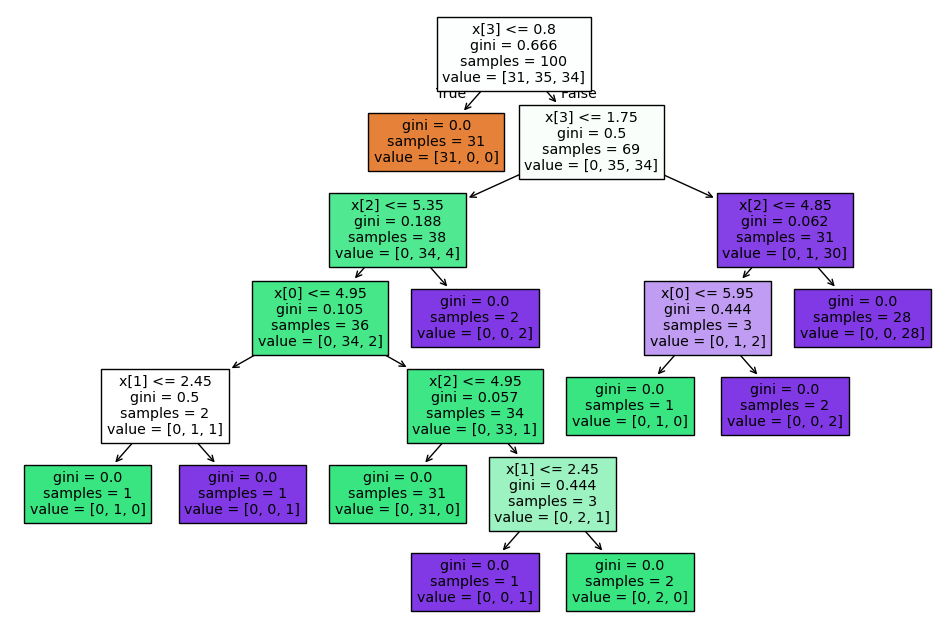

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dtc2, feature_names=None, 
          class_names=None, filled=True)
plt.show()

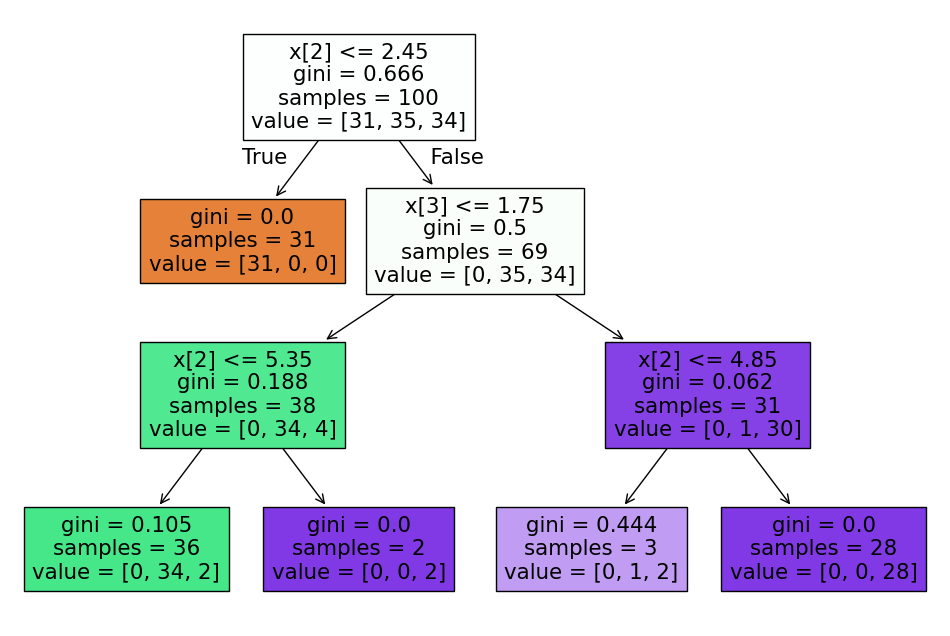

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(dtc2,  filled=True)
plt.show()

In [43]:
dtc_predict = dtc.predict(X_test)

In [44]:
dtc_f1 = f1_score(y_test, dtc_predict,average='weighted')
dtc_f1

0.98

In [45]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)
dtc_accuracy

0.98

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dtc_predict, y_test)

array([[19,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 15]])

In [47]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



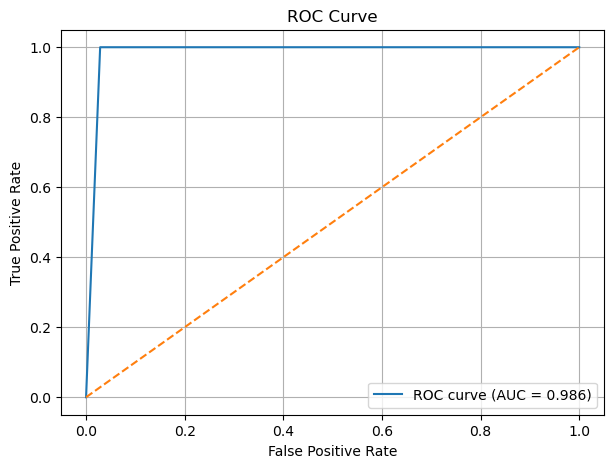

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = dtc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Логистическая регрессия

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
%%time
lrn = LogisticRegression(max_iter=500)
lrn.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 26.4 ms


LogisticRegression(max_iter=500)

In [51]:
lrn.intercept_

array([  8.69399326,   2.12547074, -10.81946401])

In [52]:
lrn.coef_

array([[-0.3885491 ,  0.85385235, -2.24492941, -0.95238238],
       [ 0.43789182, -0.36134189, -0.1237383 , -0.7727681 ],
       [-0.04934272, -0.49251046,  2.36866771,  1.72515048]])

In [53]:
lrn_predict = lrn.predict(X_test)

In [54]:
lrn_f1 = f1_score(y_test, lrn_predict,average='weighted')
lrn_f1

1.0

In [55]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)
lrn_accuracy

1.0

In [56]:
confusion_matrix(lrn_predict, y_test)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [57]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



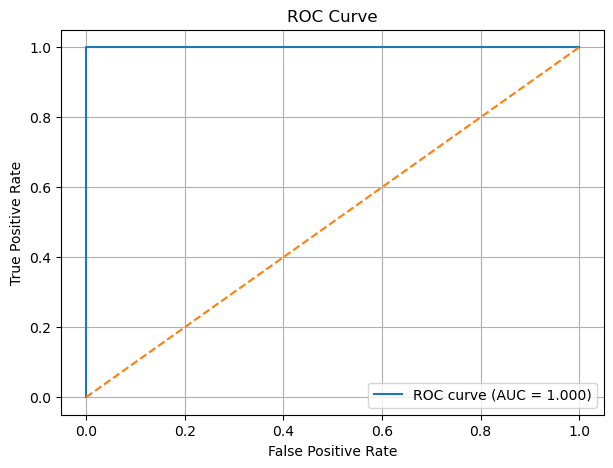

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = lrn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# RandomForestClassifie

In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
rfc_predict = rfc.predict(X_test)

In [61]:
rfc_f1 = f1_score(y_test, rfc_predict,average='weighted')
rfc_f1

0.98

In [62]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.98

In [63]:
confusion_matrix(rfc_predict, y_test)

array([[19,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 15]])

In [64]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



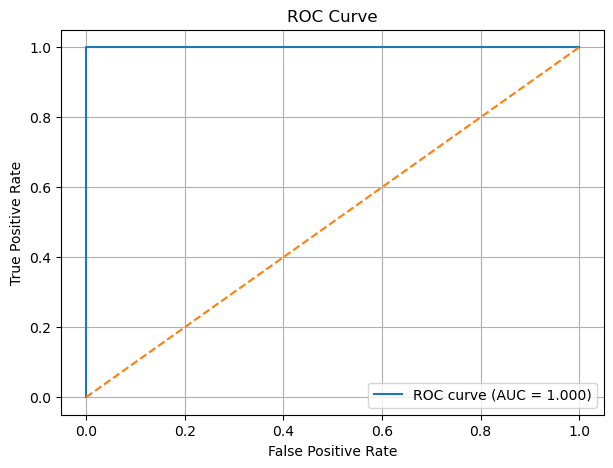

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### Метод опорных векторов

In [66]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [67]:
svc_predict = svc.predict(X_test)

In [68]:
svc_f1 = f1_score(y_test, svc_predict,average='weighted')
svc_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [69]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

1.0

In [70]:
confusion_matrix(svc_predict, y_test)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [71]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Сравнение моделей

In [72]:
classifiers = ["KNeighborsClassifier", "SVC", "DecisionTreeClassifier", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "F1-score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["F1-score"]   = [knn_f1, svc_f1, dtc_f1, rfc_f1, lrn_f1]

In [73]:
log

,Classifier,F1-score
0,KNeighborsClassifier,0.98
1,SVC,1.00
2,DecisionTreeClassifier,0.98
3,Random Forest Classifier,0.98
4,Logistic Regression,1.00


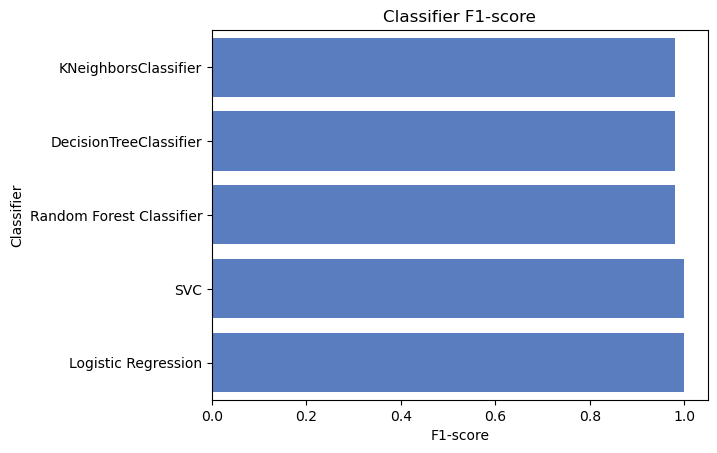

In [74]:
plt.xlabel('F1-score')
plt.title('Classifier F1-score')

sns.set_color_codes("muted")
sns.barplot(x='F1-score', y='Classifier', data=log.sort_values(by='F1-score'), color="b");
plt.show()

Вывод: подойдёт практически любая из этих моделей, но самые стабильные и точные — SVC и логистическая регрессия

# Кластеризация 

## 1. Подготовка данных

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Обучение моделей

In [80]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [81]:
# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_scaled)

In [82]:
# Spectral Clustering
spec_clust = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spec_labels = spec_clust.fit_predict(X_scaled)

## Метрики

In [85]:
print(f"K-Means:ari = {adjusted_rand_score(y, kmeans_labels):.4f}, Silhouette = {silhouette_score(X_scaled, kmeans_labels):.4f}")

K-Means:ari = 0.4328, Silhouette = 0.4799


In [86]:
print(f"Spectral: ari = {adjusted_rand_score(y, spec_labels):.4f}, Silhouette = {silhouette_score(X_scaled, spec_labels):.4f}")

Spectral: ari = 0.6465, Silhouette = 0.4593


In [87]:
print(f"Agglomerative: ari = {adjusted_rand_score(y, agg_labels):.4f}, Silhouette = {silhouette_score(X_scaled, agg_labels):.4f}")

Agglomerative: ari = 0.6153, Silhouette = 0.4467


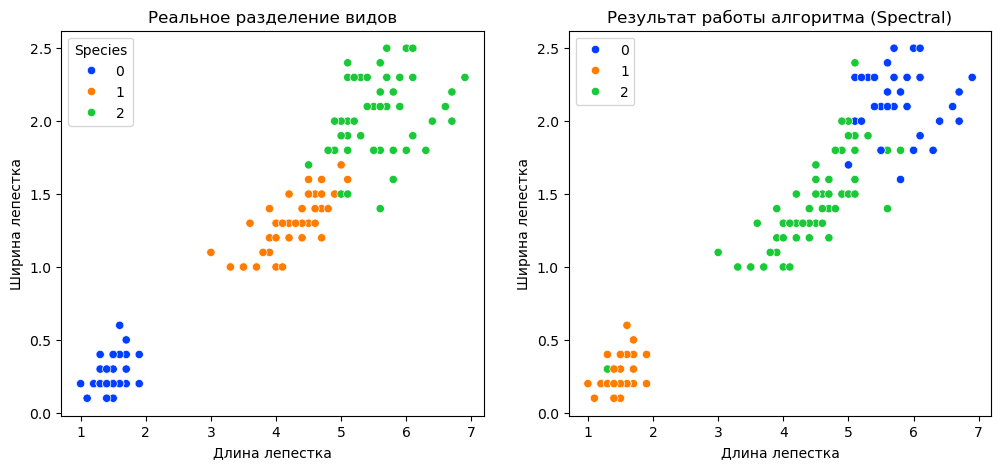

In [89]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=y, palette='bright')
plt.title('Реальное разделение видов')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=spec_labels, palette='bright')
plt.title('Результат работы алгоритма (Spectral)')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

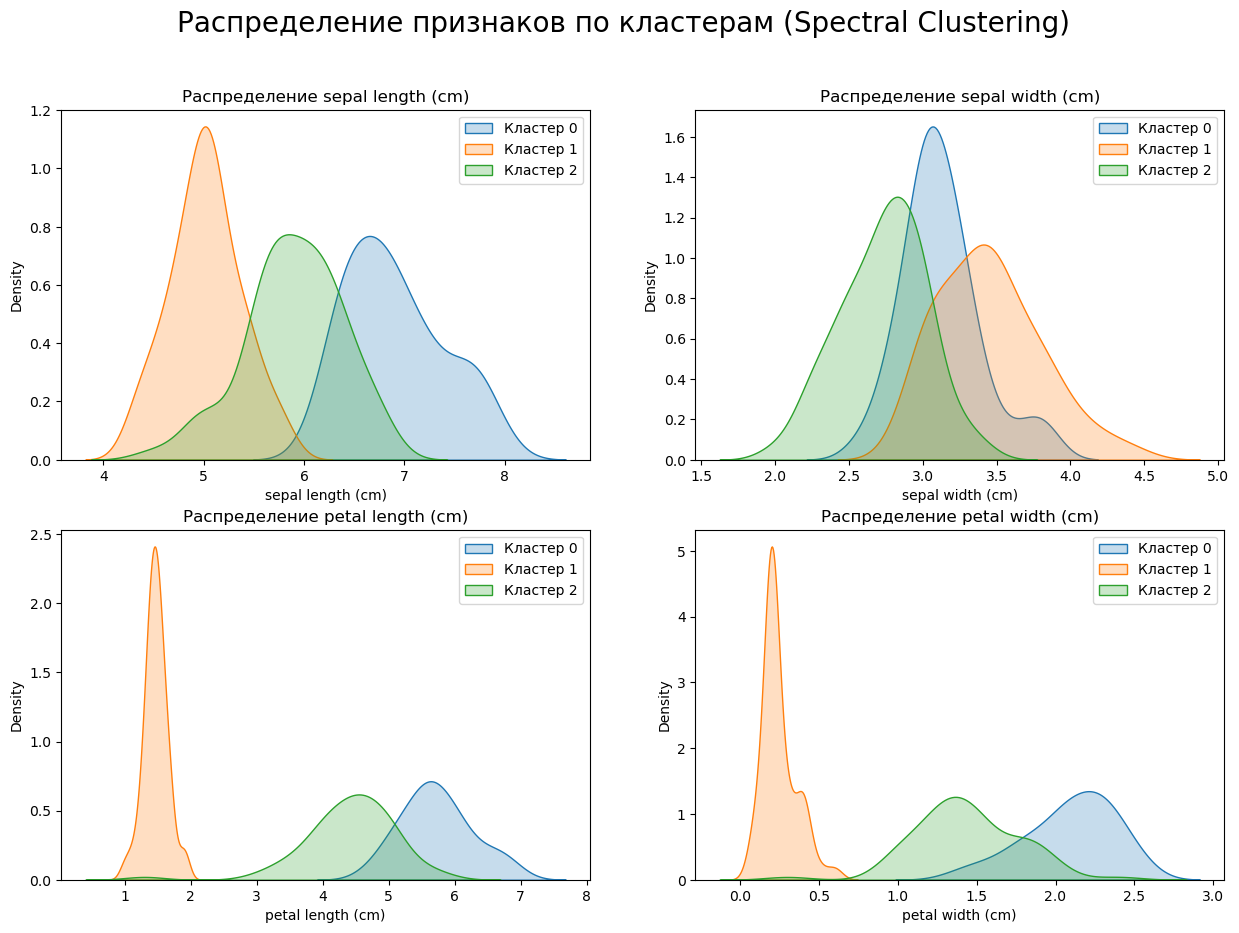

In [91]:
# График плотности для каждого признака
features = X.columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Распределение признаков по кластерам (Spectral Clustering)', fontsize=20)

for i, col in enumerate(features):
    ax = axes[i//2, i%2]
    for cluster in range(3):
        sns.kdeplot(X[spec_labels == cluster][col], label=f'Кластер {cluster}', ax=ax, fill=True)
    ax.set_title(f'Распределение {col}')
    ax.legend()

plt.show()

Глядя на графики и то, как сработал алгоритм Spectral, сразу видно, что данные распределены неравномерно. Первый вид (кластер) стоит совсем отдельно, поэтому компьютер находит его без ошибок. А вот два других вида сильно перемешаны между собой, их границы пересекаются. Это подтверждает и значение Силуэта 0.45 — оно как раз говорит о том, что кластеры нечеткие и налегают друг на друг.

Вывод 

В работе были сделаны  три модели:  K-Means, Agglomerative и Spectral Clustering.
Самый лучший оказался Spectral: ari = 0.6465

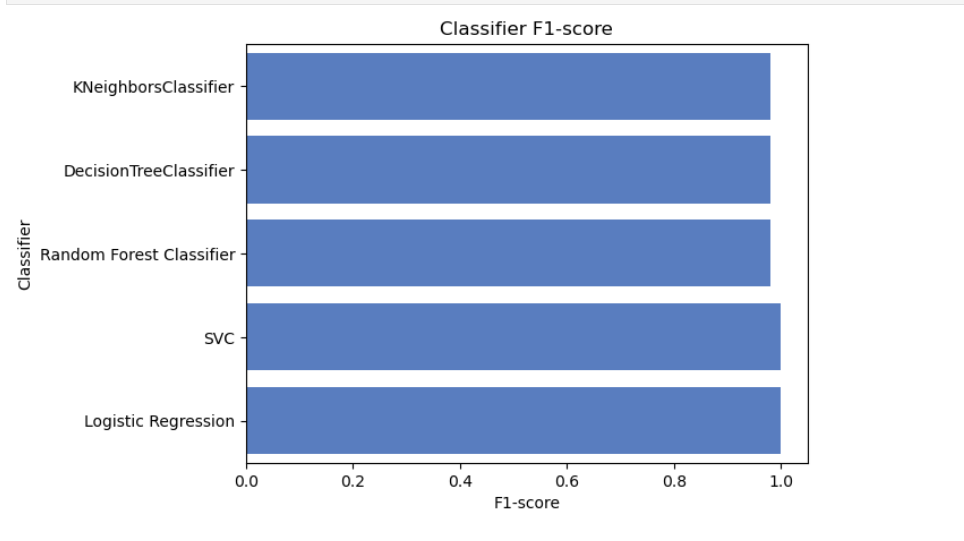

подойдёт практически любая из этих моделей, но самые стабильные и точные — SVC и логистическая регрессия

А алгоритм без учителя смог достичь до 0.65